In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data
Explore dataset

In [2]:
df = pd.read_csv('adult.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [6]:
obj_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(include='int64').columns

In [7]:
df[num_col].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
more_than_50k = df[df['income'] == '>50K']
less_than_50k = df[df['income'] == '<=50K']

In [9]:
# proportion of surveyers earning more than $50K annual salary
print('proportion of surveyers earning > 50K:', round(len(more_than_50k) / len(df['income']), 3) * 100,'%')
print('proportion of surveyers earning <= 50K:', round(len(less_than_50k) / len(df['income']), 3) * 100,'%')

proportion of surveyers earning > 50K: 23.9 %
proportion of surveyers earning <= 50K: 76.1 %


## Missing values
Find suspicious entries and impute/remove them from dataset

In [10]:
# count missing values
missing_values = pd.concat([df.isnull().sum(), df.isnull().mean()*100], axis=1)
missing_values.columns = ['counts', 'missing %']
missing_values.sort_values(by='missing %', ascending=False)

,counts,missing %
occupation,2809,5.751198
workclass,2799,5.730724
native-country,857,1.754637
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
educational-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


Most features have 0 missing values. The two columns with highest missing values only accumulate less than 6% of the total values. It is acceptable and the rest will be used for exploratory data analysis.

## Visualization

In [11]:
for each_occupation in df['occupation'].unique():
    print(each_occupation)

Machine-op-inspct
Farming-fishing
Protective-serv
nan
Other-service
Prof-specialty
Craft-repair
Adm-clerical
Exec-managerial
Tech-support
Sales
Priv-house-serv
Transport-moving
Handlers-cleaners
Armed-Forces


In [12]:
df[(df['income'] == '>50K') & (df['occupation'] == 'Machine-op-inspct')].count()

age                372
workclass          372
fnlwgt             372
education          372
educational-num    372
marital-status     372
occupation         372
relationship       372
race               372
gender             372
capital-gain       372
capital-loss       372
hours-per-week     372
native-country     365
income             372
dtype: int64

### Age and education

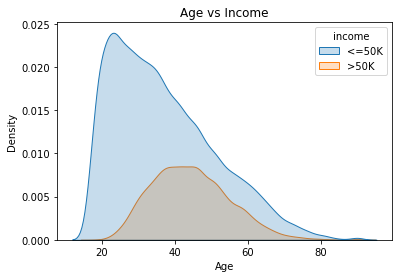

In [27]:
sns.kdeplot(x='age', data=df, hue='income', fill=True)
plt.xlabel('Age')
plt.title('Age vs Income');

The younger the age, the higher the probability that the person will earn less than $50K, especially those younger than late-30s. Why is that?

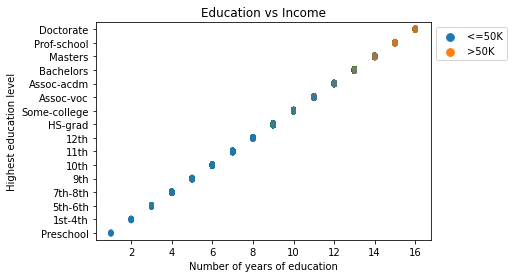

In [28]:
cat_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.stripplot(x='educational-num', y='education', data=df, hue='income', order=reversed(cat_order), alpha=0.1)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Number of years of education')
plt.ylabel('Highest education level')
plt.title('Education vs Income');

It seems that people are more common to earn more than $50K with 13 years or more of education.

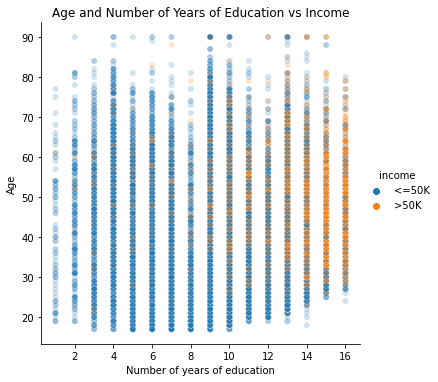

In [29]:
sns.relplot(x='educational-num', y='age', data=df, kind='scatter', hue='income', alpha=0.2)
plt.xlabel('Number of years of education')
plt.ylabel('Age')
plt.title('Age and Number of Years of Education vs Income');

This graph shows us that income earned is more correlated to number of years of education than age. Those who has 13 years or more in education tend to earn more than $50K, regardless of their age.

## Conclusion

We have looked at earning power from four different perspectives.

1. Gender, race, and working hours. Sex discrimination does not firmly exist. People who earn more are the ones who work longer hours.

2. Occupation. If you want to have a higher chance of being rich, either be self-employed by an incorporated firm, as work as an executive managerial role or in professional specialty.

3. Relationship and marital status. In a family, husbands tend to work longer than wives. However, that does not define the earning power of wives because they are equally capable of earning more than $50K with less working hours. Those who are not in relationship may work longer hours, which results in higher earning power.

4. Age and education. Earning power is positively correlated with years of education.